In [ ]:
pip install tensorflow pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
# Normalize the data
X = X / 255.0  # Scale pixel values to [0, 1]
y = y.astype(int)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
# Reshape the data to (28, 28, 1) for CNN
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)


In [ ]:
# Build the CNN model
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Define input shape here
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8905 - loss: 0.3541 - val_accuracy: 0.9809 - val_loss: 0.0696
Epoch 2/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.9839 - loss: 0.0526 - val_accuracy: 0.9849 - val_loss: 0.0476
Epoch 3/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9884 - loss: 0.0340 - val_accuracy: 0.9864 - val_loss: 0.0425
Epoch 4/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9840 - val_loss: 0.0525
Epoch 5/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.9959 - loss: 0.0137 - val_accuracy: 0.9869 - val_loss: 0.0464


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9898 - loss: 0.0372
Test accuracy: 0.9891


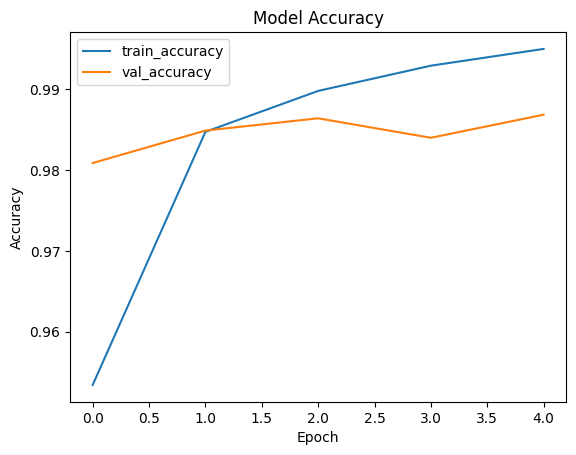

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


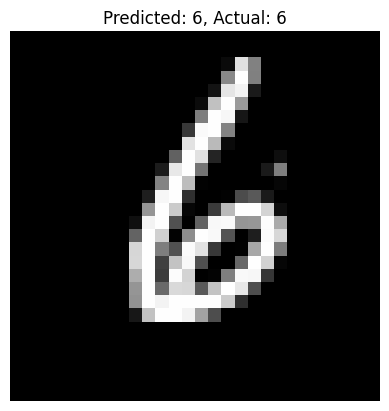

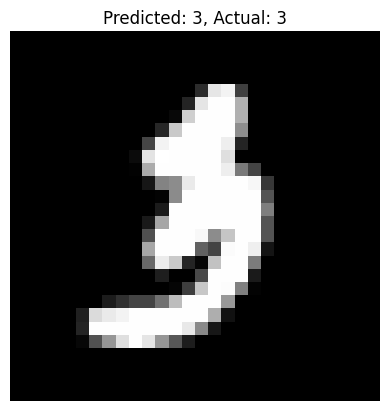

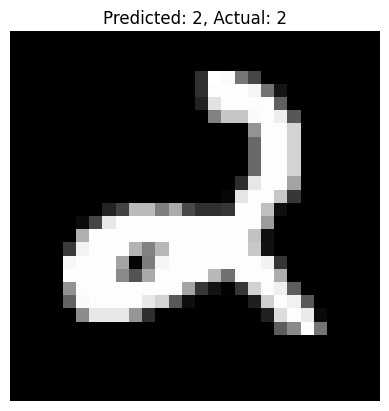

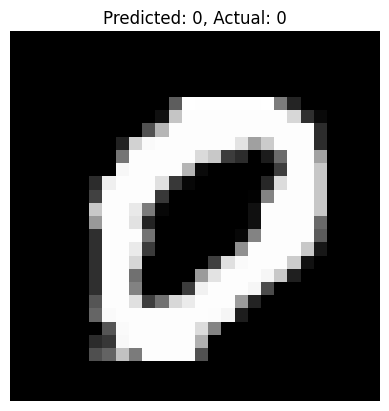

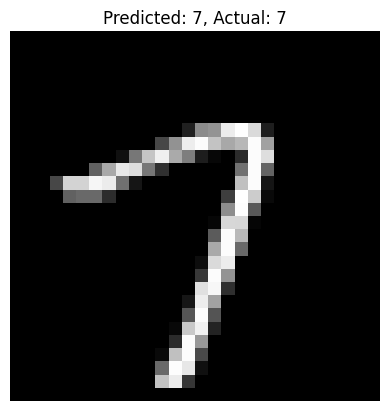

In [ ]:
# Display some predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, Actual: {y_test.values[i]}')
    plt.axis('off')
    plt.show()